# Plot the (social) Demographics of the population
---
## Import the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import numpy as np
import os
pd.set_option('mode.chained_assignment', None)

In [2]:
# create folder ./results/demographics if it does not exist
if not os.path.exists('./results/demographics'):
    os.makedirs('./results/demographics')

In [3]:
df = pd.read_csv('./data/preprocessed_total_data.csv')

In [4]:
def plot_experience(prefix_of_experience, column, df_raw, y_lim=None, path=None):
    df_programming_lang = df_raw[[column]]
    df_programming_lang.loc[:, column] = df_programming_lang[column].dropna().astype({column: int})
    tmp = dict(df_programming_lang.value_counts().sort_index())
    data = {}

    if (1.0,) in tmp.keys():
        data["no experience"] = tmp[(1.0,)]
    else:
        data["no experience"] = 0

    if (2.0,) in tmp.keys():
        data["little experience"] = tmp[(2.0,)]
    else:
        data["little experience"] = 0

    if (3.0,) in tmp.keys():
        data["average"] = tmp[(3.0,)]
    else:
        data["average"] = 0

    if (4.0,) in tmp.keys():
        data["experienced"] = tmp[(4.0,)]
    else:
        data["experienced"] = 0

    if (5.0,) in tmp.keys():
        data["proficient"] = tmp[(5.0,)]
    else:
        data["proficient"] = 0

    names, counts = zip(*data.items())
    plt.ylim(y_lim)
    plt.bar(names, counts)
    plt.title(prefix_of_experience + " Experience")
    plt.xticks(rotation=350)
    plt.xlabel("")
    plt.tight_layout()
    if path is not None:
        plt.savefig(path)
    plt.show()
    return names, counts


def plot_self_assessment(prefix_of_experience, column, df_raw, y_lim=None, path=None):
    df_programming_lang = df_raw[[column]]
    df_programming_lang.loc[:, column] = df_programming_lang[column].dropna().astype({column: int})
    tmp = dict(df_programming_lang.value_counts().sort_index())
    data = {}

    if (1.0,) in tmp.keys():
        data["significantly worse"] = tmp[(1.0,)]
    else:
        data["significantly worse"] = 0

    if (2.0,) in tmp:
        data["worse"] = tmp[(2.0,)]
    else:
        data["worse"] = 0

    if (3.0,) in tmp:
        data["same"] = tmp[(3.0,)]
    else:
        data["same"] = 0

    if (4.0,) in tmp:
        data["better"] = tmp[(4.0,)]
    else:
        data["better"] = 0

    if (5.0,) in tmp:
        data["significantly better"] = tmp[(5.0,)]
    else:
        data["significantly better"] = 0

    names, counts = zip(*data.items())
    plt.bar(names, counts)
    plt.ylim(y_lim)
    plt.title("Programming Experience Compared to " + prefix_of_experience)
    plt.xticks(rotation=350)
    plt.xlabel("")
    plt.tight_layout()
    if path is not None:
        plt.savefig(path)
    plt.show()
    return names, counts

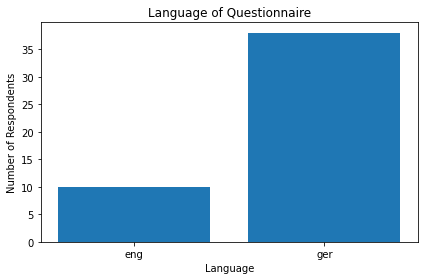

In [5]:
# plot the occurrence of different values in LANGUAGE as a bar chart
df_lang = df[['LANGUAGE']]
tmp = dict(df_lang.value_counts().sort_index())
names, counts = zip(*tmp.items())
names = tuple((name[0] for name in names))
plt.bar(names, counts)
plt.title("Language of Questionnaire")
plt.xlabel("Language")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.savefig('./results/demographics/language.pdf')
plt.show()

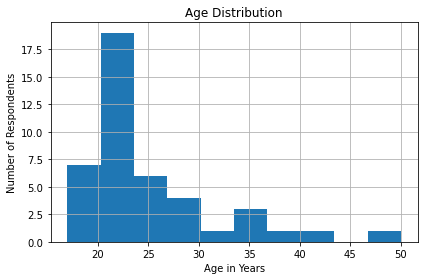

In [6]:
#plot the age distribution
axs = df.hist(column='ST03_01', bins=10)
plt.title("Age Distribution")
plt.xlabel("Age in Years")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.savefig('./results/demographics/demographics_age.pdf')
plt.show()

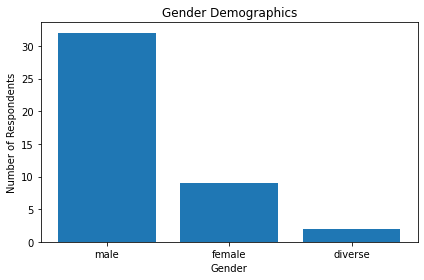

In [7]:
# plot the gender of the participants
x = ["male", "female", "diverse"]
y = [len(df[(df["ST03_02"] == "m") | (df["ST03_02"] == "M")]),
     len(df[(df["ST03_02"] == "f") | (df["ST03_02"] == "w")]),
     len(df[(df["ST03_02"] == "d") | (df["ST03_02"] == "D")])]
plt.bar(x, y)
plt.title("Gender Demographics")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.savefig('./results/demographics/demographics_gender.pdf')
plt.show()

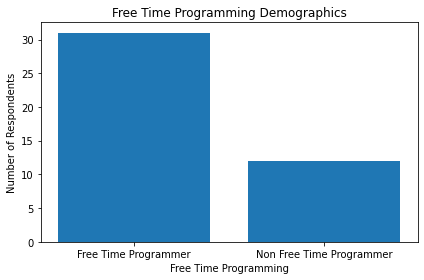

In [8]:
# plot if the participant programs in their free time
x = ["Free Time Programmer", "Non Free Time Programmer"]
y = [len(df[(df["ST03_06"] == "j") | (df["ST03_06"] == "J") | (df["ST03_06"] == "y") | (df["ST03_06"] == "Y")]),
     len(df[(df["ST03_06"] == "n") | (df["ST03_06"] == "N")])]
plt.bar(x, y)
plt.title("Free Time Programming Demographics")
plt.xlabel("Free Time Programming")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.savefig('./results/demographics/demographics_free_time_programming.pdf')
plt.show()

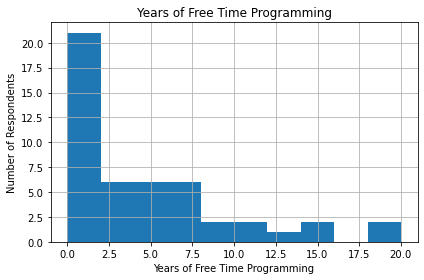

In [9]:
df["ST03_03"] = df["ST03_03"]\
    .astype(str)\
    .apply(lambda x: re.findall(r'\d+', x)[0] if len(re.findall(r'\d+', x)) > 0 else np.nan)\
    .fillna(0)\
    .astype(int)
# create histogram of ST03_03
axs = df.hist(column='ST03_03', bins=10)
plt.title("Years of Free Time Programming")
plt.xlabel("Years of Free Time Programming")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.savefig('./results/demographics/demographics_free_time_programming_years.pdf')
plt.show()

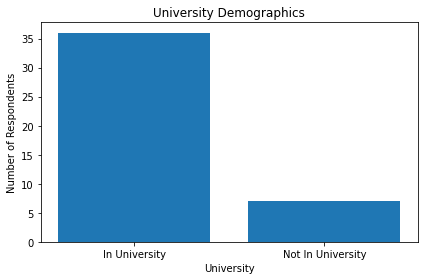

In [10]:
# plot if the participant is in university
x = ["In University", "Not In University"]
y = [len(df[(df["ST03_05"] == "j") | (df["ST03_05"] == "J") | (df["ST03_05"] == "y") | (df["ST03_05"] == "Y")]),
     len(df[(df["ST03_05"] == "n") | (df["ST03_05"] == "N")])]
plt.bar(x, y)
plt.title("University Demographics")
plt.xlabel("University")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.savefig('./results/demographics/demographics_university.pdf')
plt.show()

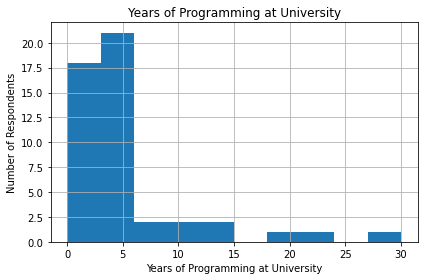

In [11]:
df["ST03_04"] = df["ST03_04"]\
    .astype(str)\
    .apply(lambda x: re.findall(r'\d+', x)[0] if len(re.findall(r'\d+', x)) > 0 else np.nan)\
    .fillna(0)\
    .astype(int)
# create histogram of ST03_04
axs = df.hist(column='ST03_04', bins=10)
plt.title("Years of Programming at University")
plt.xlabel("Years of Programming at University")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.savefig('./results/demographics/demographics_university_years.pdf')
plt.show()

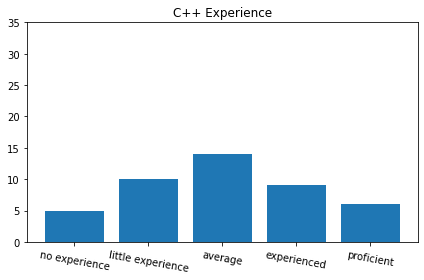

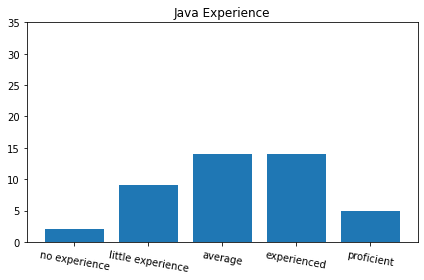

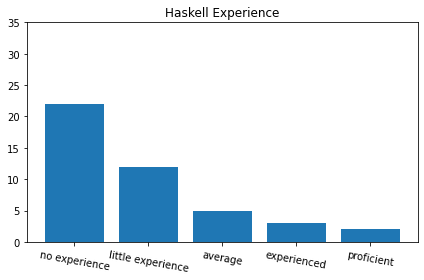

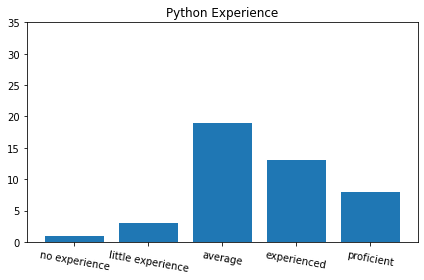

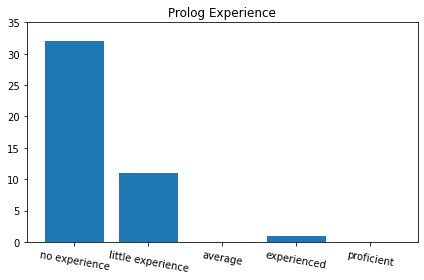

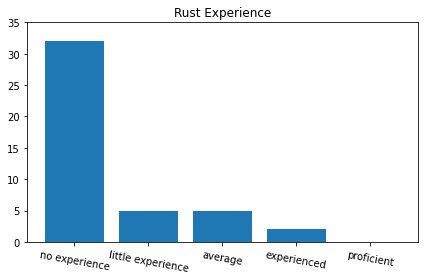

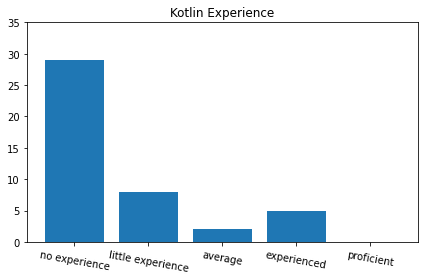

In [12]:
y_lim = (0, 35)
names, y_cpp = plot_experience("C++", "ST04_01", df, y_lim, "./results/demographics/language_cpp_experience.pdf")
_, y_java = plot_experience("Java", "ST04_02", df, y_lim, "./results/demographics/language_java_experience.pdf")
_, y_haskell = plot_experience("Haskell", "ST04_03", df, y_lim, "./results/demographics/language_haskell_experience.pdf")
_, y_python = plot_experience("Python", "ST04_04", df, y_lim, "./results/demographics/language_python_experience.pdf")
_, y_prolog = plot_experience("Prolog", "ST04_05", df, y_lim, "./results/demographics/language_prolog_experience.pdf")
_, y_rust = plot_experience("Rust", "ST04_06", df, y_lim, "./results/demographics/language_rust_experience.pdf")
_, y_kotlin =plot_experience("Kotlin", "ST04_07", df, y_lim, "./results/demographics/language_kotlin_experience.pdf")

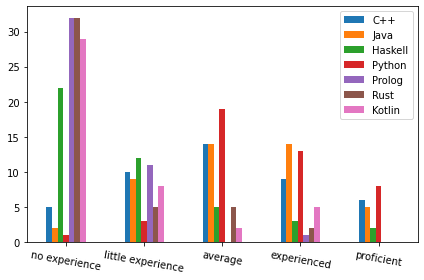

In [13]:
df_tmp = pd.DataFrame([y_cpp, y_java, y_haskell, y_python, y_prolog, y_rust, y_kotlin], columns=names)
df_tmp.index = ["C++", "Java", "Haskell", "Python", "Prolog", "Rust", "Kotlin"]
ax = df_tmp.transpose().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=-10)
plt.tight_layout()
plt.savefig('./results/demographics/language_all_experience.pdf')

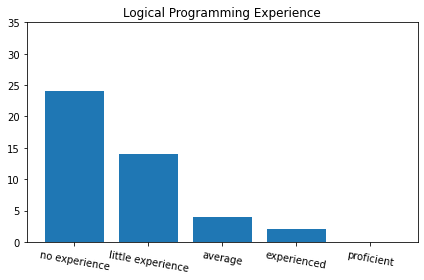

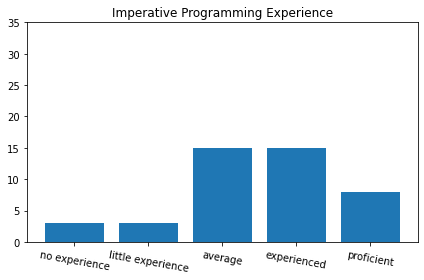

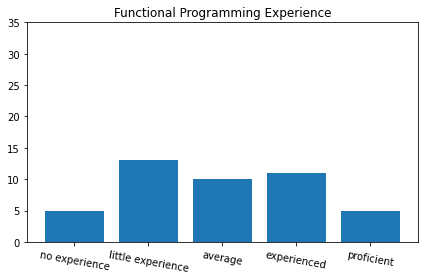

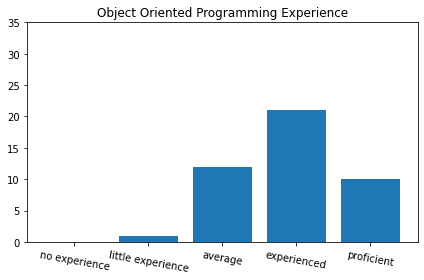

In [14]:
y_lim = (0, 35)
names, y_logical = plot_experience("Logical Programming", "ST05_01", df, y_lim, "./results/demographics/paradigm_logical_experience.pdf")
_, y_imperative = plot_experience("Imperative Programming", "ST05_02", df, y_lim, "./results/demographics/paradigm_imperative_experience.pdf")
_, y_functional = plot_experience("Functional Programming", "ST05_03", df, y_lim, "./results/demographics/paradigm_functional_experience.pdf")
_, y_object_oriented = plot_experience("Object Oriented Programming", "ST05_04", df, y_lim, "./results/demographics/paradigm_object_oriented_experience.pdf")

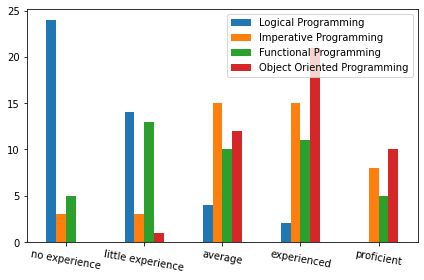

In [15]:
df_tmp = pd.DataFrame([y_logical, y_imperative, y_functional, y_object_oriented], columns=names)
df_tmp.index = ["Logical Programming", "Imperative Programming", "Functional Programming", "Object Oriented Programming"]
ax = df_tmp.transpose().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=-10)
plt.tight_layout()
plt.savefig('./results/demographics/paradigm_all_experience.pdf')

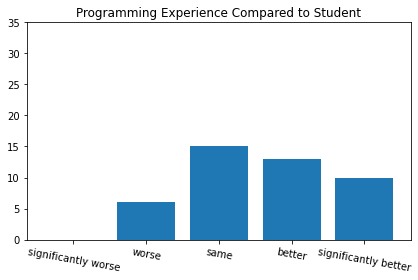

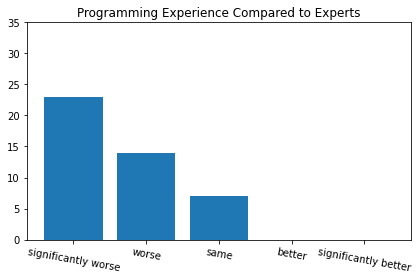

In [16]:
y_lim = (0, 35)
names, y_students = plot_self_assessment("Student", "ST06_02", df, y_lim, "./results/demographics/self_assessment_vs_student.pdf")
_, y_experts = plot_self_assessment("Experts", "ST06_03", df, y_lim, "./results/demographics/self_assessment_vs_experts.pdf")

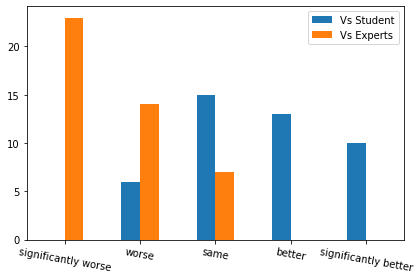

In [17]:
df_tmp = pd.DataFrame([y_students, y_experts], columns=names)
df_tmp.index = ["Vs Student", "Vs Experts"]
ax = df_tmp.transpose().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=-10)
plt.tight_layout()
plt.savefig('./results/demographics/self_assessment_all_experience.pdf')

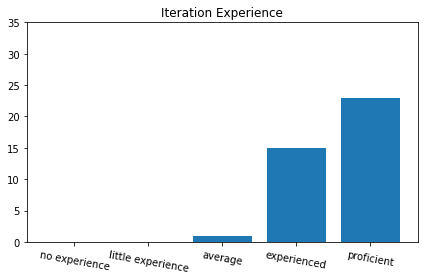

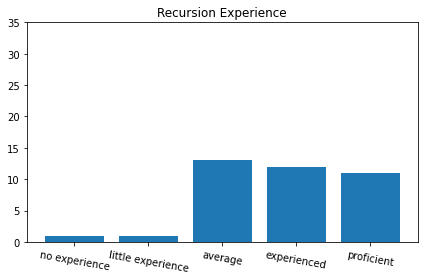

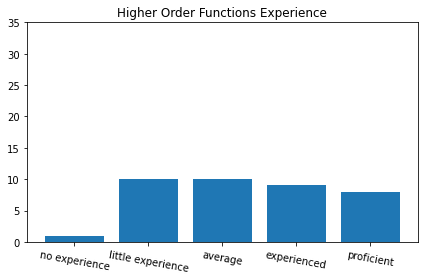

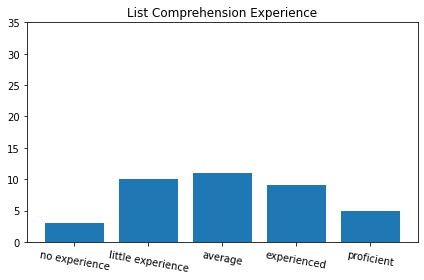

In [18]:
names, y_iteration = plot_experience("Iteration", "ST12", df, y_lim, "./results/demographics/style_iteration_experience.pdf")
_, y_recursion = plot_experience("Recursion", "ST13", df, y_lim, "./results/demographics/style_recursion_experience.pdf")
_, y_higher_order = plot_experience("Higher Order Functions", "ST14", df, y_lim, "./results/demographics/style_higher_order_experience.pdf")
_, y_list_comprehension = plot_experience("List Comprehension", "ST15", df, y_lim, "./results/demographics/style_list_comprehension_experience.pdf")

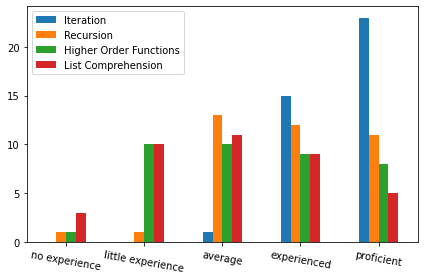

In [19]:
df_tmp = pd.DataFrame([y_iteration, y_recursion, y_higher_order, y_list_comprehension], columns=names)
df_tmp.index = ["Iteration", "Recursion", "Higher Order Functions", "List Comprehension"]
ax = df_tmp.transpose().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=-10)
plt.tight_layout()
plt.savefig('./results/demographics/style_all_experience.pdf')